Import Required Modules

In [75]:
import requests
import json
import time
import itertools
import os
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict

Data Analysis 

Total Examples: 2601


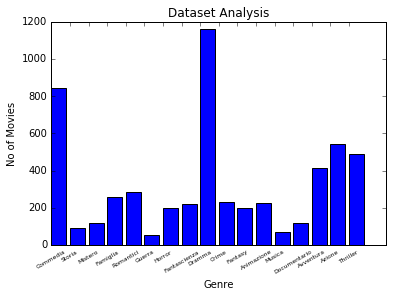

In [76]:
with open('fin_data.json') as f:
    data = json.load(f)

si = len(data)
print("Total Examples: {}".format(si));

fre = {}

for i in range(si):
	#url = data[i]["poster_movie_url"]
	for key in data[i]:
		if(data[i][key]==1):
			if(key not in fre):
				fre[key]=1
			else:
				fre[key]+=1

label = []
no_movies = []

for key in fre:
	label.append(key)
	no_movies.append(fre[key])


index = np.arange(len(label))
plt.bar(index, no_movies)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('No of Movies', fontsize=10)
plt.xticks(index, label, fontsize=6, rotation=30)
plt.title('Dataset Analysis')
plt.show()


In [77]:
#To create a map between genre id of each genre and name of the genre
GenreIDToName={}
genreNameBuild = ['Crime', 'Dramma', 'Thriller', 'Musica', 'Fantasy', 'Fantascienza','Animazione', 'Horror', 
'Commedia', 'Avventura', 'Romantici', 'Documentario', 'Famiglia', 'Mistero', 'Storia', 'Azione', 'Guerra']
genreNameBuild.sort()
for i in range(len(genreNameBuild)):
	GenreIDToName[i]=genreNameBuild[i]
print(genreNameBuild)

['Animazione', 'Avventura', 'Azione', 'Commedia', 'Crime', 'Documentario', 'Dramma', 'Famiglia', 'Fantascienza', 'Fantasy', 'Guerra', 'Horror', 'Mistero', 'Musica', 'Romantici', 'Storia', 'Thriller']


Input Vector for Movie posters using VGG Feature Extraction

In [78]:
import pickle
import os
import cv2

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
#from PIL import Image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pickle
model = VGG16(weights='imagenet', include_top=False)


In [79]:
import os.path
from PIL import Image
import os,time


def verify_image(img_file):
     #test image
    try:
        im=Image.open(img_file)
        return 1
    # do stuff
    except IOError:
        # filename not an image file
        return 0

Combining Features of Poster_movie photos and Poster_movie photos

In [80]:
featureList=[]
genreList=[]
fileOrder=[]
finalMoviesSet=[]
print "Started extracting features for poster_images."
print "Total images = ",len(data)

posterFolder='poster_images/'
trailerFolder = 'poster_trailer/'
feature_size = 8192

for i in range(len(data)):
    features = np.ndarray(shape=(1,4,4,512), dtype=float)
    url = data[i]["poster_movie_url"]
    fl=1
    if(url !=None):
        url = url.split('/')
        path = url[-1]
        path = posterFolder + path
        if(os.path.exists(path)):
            if(verify_image(path)==1):
                img = image.load_img(path, target_size=(150, 150))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                features_1 = model.predict(x)
                features = features_1
                fl=0
            
    url = data[i]["poster_trailer_url"]
    if(url !=None):
        url = url.split('/')
        path = url[-1]
        path = trailerFolder + path
        if(os.path.exists(path)):
            if(verify_image(path)==1):
                img = image.load_img(path, target_size=(150, 150))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                feature_2 = model.predict(x)
                if(fl):
                    features = feature_2
                else:
                    for j in range(len(features)):
                        features[j] =(features[j]+feature_2[j])/2
    featureList.append(features)
    temp = []
    j=0
    for genre in label :
        if(data[i][genre]==1):
            temp.append(j)
        j+=1
    genreList.append(temp)
    if np.max(np.asarray(featureList))==0.0:
        print('problematic',i)
    if i>1:
        print "Working on Image : ",i
"Done Succesfully"

Started extracting features for poster_images.
Total images =  2601
Working on Image :  2
Working on Image :  3
Working on Image :  4
Working on Image :  5
Working on Image :  6
Working on Image :  7
Working on Image :  8
Working on Image :  9
Working on Image :  10
Working on Image :  11
Working on Image :  12
Working on Image :  13
Working on Image :  14
Working on Image :  15
Working on Image :  16
Working on Image :  17
Working on Image :  18
Working on Image :  19
Working on Image :  20
Working on Image :  21
Working on Image :  22
Working on Image :  23
Working on Image :  24
Working on Image :  25
Working on Image :  26
Working on Image :  27
Working on Image :  28
Working on Image :  29
Working on Image :  30
Working on Image :  31
Working on Image :  32
Working on Image :  33
Working on Image :  34
Working on Image :  35
Working on Image :  36
Working on Image :  37
Working on Image :  38
Working on Image :  39
Working on Image :  40
Working on Image :  41
Working on Image :  

Working on Image :  345
Working on Image :  346
Working on Image :  347
Working on Image :  348
Working on Image :  349
Working on Image :  350
Working on Image :  351
Working on Image :  352
Working on Image :  353
Working on Image :  354
Working on Image :  355
Working on Image :  356
Working on Image :  357
Working on Image :  358
Working on Image :  359
Working on Image :  360
Working on Image :  361
Working on Image :  362
Working on Image :  363
Working on Image :  364
Working on Image :  365
Working on Image :  366
Working on Image :  367
Working on Image :  368
Working on Image :  369
Working on Image :  370
Working on Image :  371
Working on Image :  372
Working on Image :  373
Working on Image :  374
Working on Image :  375
Working on Image :  376
Working on Image :  377
Working on Image :  378
Working on Image :  379
Working on Image :  380
Working on Image :  381
Working on Image :  382
Working on Image :  383
Working on Image :  384
Working on Image :  385
Working on Image

Working on Image :  687
Working on Image :  688
Working on Image :  689
Working on Image :  690
Working on Image :  691
Working on Image :  692
Working on Image :  693
Working on Image :  694
Working on Image :  695
Working on Image :  696
Working on Image :  697
Working on Image :  698
Working on Image :  699
Working on Image :  700
Working on Image :  701
Working on Image :  702
Working on Image :  703
Working on Image :  704
Working on Image :  705
Working on Image :  706
Working on Image :  707
Working on Image :  708
Working on Image :  709
Working on Image :  710
Working on Image :  711
Working on Image :  712
Working on Image :  713
Working on Image :  714
Working on Image :  715
Working on Image :  716
Working on Image :  717
Working on Image :  718
Working on Image :  719
Working on Image :  720
Working on Image :  721
Working on Image :  722
Working on Image :  723
Working on Image :  724
Working on Image :  725
Working on Image :  726
Working on Image :  727
Working on Image

Working on Image :  1028
Working on Image :  1029
Working on Image :  1030
Working on Image :  1031
Working on Image :  1032
Working on Image :  1033
Working on Image :  1034
Working on Image :  1035
Working on Image :  1036
Working on Image :  1037
Working on Image :  1038
Working on Image :  1039
Working on Image :  1040
Working on Image :  1041
Working on Image :  1042
Working on Image :  1043
Working on Image :  1044
Working on Image :  1045
Working on Image :  1046
Working on Image :  1047
Working on Image :  1048
Working on Image :  1049
Working on Image :  1050
Working on Image :  1051
Working on Image :  1052
Working on Image :  1053
Working on Image :  1054
Working on Image :  1055
Working on Image :  1056
Working on Image :  1057
Working on Image :  1058
Working on Image :  1059
Working on Image :  1060
Working on Image :  1061
Working on Image :  1062
Working on Image :  1063
Working on Image :  1064
Working on Image :  1065
Working on Image :  1066
Working on Image :  1067


Working on Image :  1356
Working on Image :  1357
Working on Image :  1358
Working on Image :  1359
Working on Image :  1360
Working on Image :  1361
Working on Image :  1362
Working on Image :  1363
Working on Image :  1364
Working on Image :  1365
Working on Image :  1366
Working on Image :  1367
Working on Image :  1368
Working on Image :  1369
Working on Image :  1370
Working on Image :  1371
Working on Image :  1372
Working on Image :  1373
Working on Image :  1374
Working on Image :  1375
Working on Image :  1376
Working on Image :  1377
Working on Image :  1378
Working on Image :  1379
Working on Image :  1380
Working on Image :  1381
Working on Image :  1382
Working on Image :  1383
Working on Image :  1384
Working on Image :  1385
Working on Image :  1386
Working on Image :  1387
Working on Image :  1388
Working on Image :  1389
Working on Image :  1390
Working on Image :  1391
Working on Image :  1392
Working on Image :  1393
Working on Image :  1394
Working on Image :  1395


Working on Image :  1684
Working on Image :  1685
Working on Image :  1686
Working on Image :  1687
Working on Image :  1688
Working on Image :  1689
Working on Image :  1690
Working on Image :  1691
Working on Image :  1692
Working on Image :  1693
Working on Image :  1694
Working on Image :  1695
Working on Image :  1696
Working on Image :  1697
Working on Image :  1698
Working on Image :  1699
Working on Image :  1700
Working on Image :  1701
Working on Image :  1702
Working on Image :  1703
Working on Image :  1704
Working on Image :  1705
Working on Image :  1706
Working on Image :  1707
Working on Image :  1708
Working on Image :  1709
Working on Image :  1710
Working on Image :  1711
Working on Image :  1712
Working on Image :  1713
Working on Image :  1714
Working on Image :  1715
Working on Image :  1716
Working on Image :  1717
Working on Image :  1718
Working on Image :  1719
Working on Image :  1720
Working on Image :  1721
Working on Image :  1722
Working on Image :  1723


Working on Image :  2012
Working on Image :  2013
Working on Image :  2014
Working on Image :  2015
Working on Image :  2016
Working on Image :  2017
Working on Image :  2018
Working on Image :  2019
Working on Image :  2020
Working on Image :  2021
Working on Image :  2022
Working on Image :  2023
Working on Image :  2024
Working on Image :  2025
Working on Image :  2026
Working on Image :  2027
Working on Image :  2028
Working on Image :  2029
Working on Image :  2030
Working on Image :  2031
Working on Image :  2032
Working on Image :  2033
Working on Image :  2034
Working on Image :  2035
Working on Image :  2036
Working on Image :  2037
Working on Image :  2038
Working on Image :  2039
Working on Image :  2040
Working on Image :  2041
Working on Image :  2042
Working on Image :  2043
Working on Image :  2044
Working on Image :  2045
Working on Image :  2046
Working on Image :  2047
Working on Image :  2048
Working on Image :  2049
Working on Image :  2050
Working on Image :  2051


Working on Image :  2340
Working on Image :  2341
Working on Image :  2342
Working on Image :  2343
Working on Image :  2344
Working on Image :  2345
Working on Image :  2346
Working on Image :  2347
Working on Image :  2348
Working on Image :  2349
Working on Image :  2350
Working on Image :  2351
Working on Image :  2352
Working on Image :  2353
Working on Image :  2354
Working on Image :  2355
Working on Image :  2356
Working on Image :  2357
Working on Image :  2358
Working on Image :  2359
Working on Image :  2360
Working on Image :  2361
Working on Image :  2362
Working on Image :  2363
Working on Image :  2364
Working on Image :  2365
Working on Image :  2366
Working on Image :  2367
Working on Image :  2368
Working on Image :  2369
Working on Image :  2370
Working on Image :  2371
Working on Image :  2372
Working on Image :  2373
Working on Image :  2374
Working on Image :  2375
Working on Image :  2376
Working on Image :  2377
Working on Image :  2378
Working on Image :  2379


'Done Succesfully'

In [81]:
print(len(featureList))
print(len(genre))
(a,b,c,d)=featureList[0].shape
featureSize=a*b*c*d
print featureSize

2601
8
8192


Feature generation using poster images and poster trailer 

In [82]:
npFeatures=np.zeros((len(featureList),featureSize))
for i in range(len(featureList)):
    feat=featureList[i]
    reshapedFeat=feat.reshape(1,-1)
    npFeatures[i]=reshapedFeat
    
X=npFeatures
print(X.shape)

(2601, 8192)


Feature Extraction for Title + Summary

In [84]:
#### Stop Words stored manually
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import defaultdict
import numpy as np
with open('stopwords_italian.txt', 'r') as file :
        stop_words = set(file.read().split('\n'))
        stop_dict = defaultdict(int)
        for word in stop_words:
            stop_dict[word] = 1

movieMeanWordvec=np.zeros((len(data),300))
movieMeanWordvec.shape

model = Word2Vec.load('glove/berardi/glove_WIKI') # glove model

for i in range(len(data)):
    text = ""
    if(data[i]["title"]!=None):
        text = data[i]["title"]
    if(data[i]["summary"]!=None):
        text = text + data[i]["summary"]
    tokens = word_tokenize(text)
    #print(tokens)
    tokens = [word for word in tokens if stop_dict[word] != 1]
    if(len(tokens)==0):
        continue
    s=0
    count_in_vocab = 0
    for token in tokens:
        if token.lower() in model.wv.vocab:
            count_in_vocab+=1
            s+=model.wv[token.lower()]
    if count_in_vocab!=0:
            movieMeanWordvec[i]=s/float(count_in_vocab)
    print("done for {}".format(i))

done for 0
done for 1
done for 2
done for 3
done for 4
done for 5
done for 6
done for 7
done for 8
done for 9
done for 10
done for 11
done for 12
done for 13
done for 14
done for 15
done for 16
done for 17
done for 18
done for 19
done for 20
done for 21
done for 22
done for 23
done for 24
done for 25
done for 26
done for 27
done for 28
done for 29
done for 30
done for 31
done for 32
done for 33
done for 34
done for 35
done for 36
done for 37
done for 38
done for 39
done for 40
done for 41
done for 42
done for 43
done for 44
done for 45
done for 46
done for 47
done for 48
done for 49
done for 50
done for 51
done for 52
done for 53
done for 54
done for 55
done for 56
done for 57
done for 58
done for 59
done for 60
done for 61
done for 62
done for 63
done for 64
done for 65
done for 66
done for 67
done for 68
done for 69
done for 70
done for 71
done for 72
done for 73
done for 74
done for 75
done for 76
done for 77
done for 78
done for 79
done for 80
done for 81
done for 82
done for 83
do

done for 705
done for 706
done for 707
done for 708
done for 709
done for 710
done for 711
done for 712
done for 713
done for 714
done for 715
done for 716
done for 717
done for 718
done for 719
done for 720
done for 721
done for 722
done for 723
done for 724
done for 725
done for 726
done for 727
done for 728
done for 729
done for 730
done for 731
done for 732
done for 733
done for 734
done for 735
done for 736
done for 737
done for 738
done for 739
done for 740
done for 741
done for 742
done for 743
done for 744
done for 745
done for 746
done for 747
done for 748
done for 749
done for 750
done for 751
done for 752
done for 753
done for 754
done for 755
done for 756
done for 757
done for 758
done for 759
done for 760
done for 761
done for 762
done for 763
done for 764
done for 765
done for 766
done for 767
done for 768
done for 769
done for 770
done for 771
done for 772
done for 773
done for 774
done for 775
done for 776
done for 777
done for 778
done for 779
done for 780
done for 781

done for 1412
done for 1413
done for 1414
done for 1415
done for 1416
done for 1417
done for 1418
done for 1419
done for 1420
done for 1421
done for 1422
done for 1423
done for 1424
done for 1425
done for 1426
done for 1427
done for 1428
done for 1429
done for 1430
done for 1431
done for 1432
done for 1433
done for 1434
done for 1435
done for 1436
done for 1437
done for 1438
done for 1439
done for 1440
done for 1441
done for 1442
done for 1443
done for 1444
done for 1445
done for 1446
done for 1447
done for 1448
done for 1449
done for 1450
done for 1451
done for 1452
done for 1453
done for 1454
done for 1455
done for 1456
done for 1457
done for 1458
done for 1459
done for 1460
done for 1461
done for 1462
done for 1463
done for 1464
done for 1465
done for 1466
done for 1467
done for 1468
done for 1469
done for 1470
done for 1471
done for 1472
done for 1473
done for 1474
done for 1475
done for 1476
done for 1477
done for 1478
done for 1479
done for 1480
done for 1481
done for 1482
done f

done for 2001
done for 2002
done for 2003
done for 2004
done for 2005
done for 2006
done for 2007
done for 2008
done for 2009
done for 2010
done for 2011
done for 2012
done for 2013
done for 2014
done for 2015
done for 2016
done for 2017
done for 2018
done for 2019
done for 2020
done for 2021
done for 2022
done for 2023
done for 2024
done for 2025
done for 2026
done for 2027
done for 2028
done for 2029
done for 2030
done for 2031
done for 2032
done for 2033
done for 2034
done for 2035
done for 2036
done for 2037
done for 2038
done for 2039
done for 2040
done for 2041
done for 2042
done for 2043
done for 2044
done for 2045
done for 2046
done for 2047
done for 2048
done for 2049
done for 2050
done for 2051
done for 2052
done for 2053
done for 2054
done for 2055
done for 2056
done for 2057
done for 2058
done for 2059
done for 2060
done for 2061
done for 2062
done for 2063
done for 2064
done for 2065
done for 2066
done for 2067
done for 2068
done for 2069
done for 2070
done for 2071
done f

done for 2599
done for 2600


In [85]:
mask2=[]
for row in range(len(movieMeanWordvec)):
        mask2.append(True)
X_textfeature=movieMeanWordvec[mask2]
X_textfeature.shape
X_fea = np.concatenate((X,X_textfeature),axis=1)
X = X_fea
print(X.shape)

(2601, 8492)


In [86]:
genres=[]
allIds=[]
for i in range(len(data)) :
    temp = []
    j=0
    for genre in label :
        if(data[i][genre]==1):
            temp.append(j)
        j+=1
    genres.append(temp)
    allIds.extend(temp)
    
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)
print(Y[0])
print mlb.classes_
print Y.shape
print len(label)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
(2601, 17)
17


In [87]:
visualProblemData=(X,Y)

In [88]:
#Again, dividing data into test set and train set
mask = np.random.rand(len(X)) < 0.8
XTrain=X[mask]
XTest=X[~mask]
YTrain=Y[mask]
YTest=Y[~mask]
XTest.shape

(513, 8492)

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
modelVisual = Sequential([
    Dense(1024, input_shape=(8492,)),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(17),
    Activation('softmax'),
])
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

#sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
modelVisual.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [90]:
modelVisual.fit(XTrain, YTrain, epochs=10, batch_size=64,verbose=1)

Epoch 1/10
2088/2088 [==============================] - 6s 3ms/step - loss: 2.1838 - acc: 0.8338
Epoch 2/10
2088/2088 [==============================] - 6s 3ms/step - loss: 0.9029 - acc: 0.8704
Epoch 3/10
2088/2088 [==============================] - 7s 3ms/step - loss: 0.5055 - acc: 0.8997
Epoch 4/10
2088/2088 [==============================] - 6s 3ms/step - loss: 0.3477 - acc: 0.9138
Epoch 5/10
2088/2088 [==============================] - 6s 3ms/step - loss: 0.2994 - acc: 0.9206
Epoch 6/10
2088/2088 [==============================] - 6s 3ms/step - loss: 0.2862 - acc: 0.9230
Epoch 7/10
2088/2088 [==============================] - 6s 3ms/step - loss: 0.2582 - acc: 0.9236
Epoch 8/10
2088/2088 [==============================] - 7s 3ms/step - loss: 0.2356 - acc: 0.9240
Epoch 9/10
2088/2088 [==============================] - 7s 3ms/step - loss: 0.2187 - acc: 0.9244
Epoch 10/10
2088/2088 [==============================] - 7s 4ms/step - loss: 0.2130 - acc: 0.9247


In [91]:
YPreds=modelVisual.predict(XTest)
print(YPreds)

[[8.3559602e-03 2.7886266e-01 5.6563184e-02 ... 2.5684021e-02
  3.0641693e-01 1.1541627e-01]
 [5.6780234e-02 2.1401921e-03 1.2874093e-05 ... 3.0711147e-01
  5.8006928e-03 1.6023901e-05]
 [5.2511587e-04 1.9249530e-04 9.2540740e-04 ... 6.0887734e-04
  3.8956219e-04 6.5859393e-05]
 ...
 [2.6008019e-01 5.9192646e-02 1.3568573e-02 ... 6.9462867e-03
  9.0953130e-03 8.6630285e-02]
 [2.6907351e-02 1.0637749e-02 7.6300697e-03 ... 5.8191866e-02
  4.9653199e-01 6.3879654e-02]
 [2.8763440e-01 1.3496172e-01 3.9833304e-03 ... 1.2818085e-02
  8.7091118e-02 1.8446727e-01]]


In [92]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

In [93]:
precs=[]
recs=[]
for i in range(len(YPreds)):
    row=YPreds[i]
    gtGenres=YTest[i]
    gtGenreNames=[]
    for j in range(17):
        if gtGenres[j]==1:
            gtGenreNames.append(GenreIDToName[j])
    threshold = 0.9e-1
    top = []
    for z in range(len(row)):
        if(row[z]>=threshold):
            top.append(z)
    predictedGenres=[]
    for genre in top:
        predictedGenres.append(GenreIDToName[genre])
    (precision,recall)=precision_recall(gtGenreNames,predictedGenres)
    precs.append(precision)
    recs.append(recall)
    if i%20==0:
        print "Predicted:",','.join(predictedGenres)," |      Actual:",','.join(gtGenreNames)
        
print "Mean precision = ", np.mean(np.asarray(precs)),"," ,"Mean Recalls = ", np.mean(np.asarray(recs))
p_1 = np.mean(np.asarray(precs))
r_1 = np.mean(np.asarray(recs))
score_f = (2*p_1*r_1)/(p_1+r_1)
print("F1 Score :{}".format(score_f))

Predicted: Avventura,Dramma,Storia,Thriller  |      Actual: Animazione,Commedia,Romantici
Predicted: Animazione,Crime,Fantascienza  |      Actual: Guerra
Predicted: Animazione  |      Actual: Crime,Fantascienza
Predicted: Animazione,Fantascienza  |      Actual: Animazione
Predicted: Animazione,Fantascienza  |      Actual: Crime,Storia,Thriller
Predicted: Fantascienza  |      Actual: Fantascienza
Predicted: Animazione,Commedia,Fantascienza  |      Actual: Mistero,Musica
Predicted: Animazione,Fantascienza  |      Actual: Animazione
Predicted: Animazione,Horror  |      Actual: Commedia,Horror,Romantici
Predicted: Fantascienza,Storia,Thriller  |      Actual: Thriller
Predicted: Animazione  |      Actual: Fantascienza,Fantasy
Predicted: Fantascienza,Fantasy,Guerra,Romantici,Storia  |      Actual: Fantascienza,Fantasy,Thriller
Predicted: Fantascienza  |      Actual: Fantascienza
Predicted: Fantascienza  |      Actual: Animazione,Crime,Fantascienza
Predicted: Animazione,Commedia,Fantascienza 

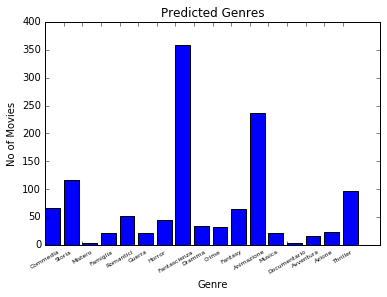

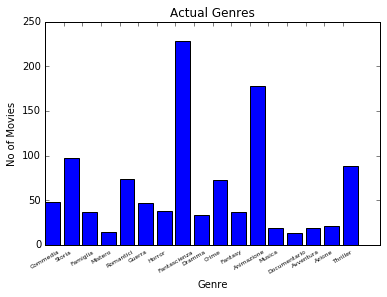

In [94]:
fre_1 = {} # For YPreds
fre_2 = {} # For YTest

for i in range(len(YPreds)):
    row = YPreds[i]
    gtGenres = YTest[i]
    for j in range(17):
        if gtGenres[j]==1:
            if(GenreIDToName[j] not in fre_2):
                fre_2[GenreIDToName[j]]=1
            else:
                fre_2[GenreIDToName[j]]+=1
    threshold = 0.9e-1
    top = []
    for z in range(len(row)):
        if(row[z]>=threshold):
            if(GenreIDToName[z] not in fre_1):
                fre_1[GenreIDToName[z]]=1
            else:
                fre_1[GenreIDToName[z]]+=1
si = len(YPreds)

label = []
no_movies = []

for key in fre_1:
	label.append(key)
	no_movies.append(fre_1[key])


index = np.arange(len(label))
plt.bar(index, no_movies)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('No of Movies', fontsize=10)
plt.xticks(index, label, fontsize=6, rotation=30)
plt.title('Predicted Genres')
plt.show()

label = []
no_movies = []

for key in fre_2:
	label.append(key)
	no_movies.append(fre_2[key])

index = np.arange(len(label))
plt.bar(index, no_movies)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('No of Movies', fontsize=10)
plt.xticks(index, label, fontsize=6, rotation=30)
plt.title('Actual Genres')
plt.show()